In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist as dt

In [3]:
(x_train, y_train), (x_test, y_test) = dt.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test {x_test.shape}")
print(f"Shape of y_test {y_test.shape}")

Shape of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of x_test (10000, 28, 28)
Shape of y_test (10000,)


In [ ]:
plt.imshow(x_train[25])
plt.show()
print(y_train[25])

In [ ]:
x_train = x_train/255
x_test = x_test/255

print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(50,activation='relu',name='L1'),
keras.layers.Dense(50,activation='relu',name='L2'),
keras.layers.Dense(10,activation='softmax',name='L3')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer="sgd",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
batch_size=30,
epochs=10,
validation_data=(x_test, y_test),
shuffle=True)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6609 - loss: 1.1475 - val_accuracy: 0.9093 - val_loss: 0.3252
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9050 - loss: 0.3221 - val_accuracy: 0.9253 - val_loss: 0.2680
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9231 - loss: 0.2691 - val_accuracy: 0.9345 - val_loss: 0.2327
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9335 - loss: 0.2322 - val_accuracy: 0.9377 - val_loss: 0.2144
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9410 - loss: 0.2033 - val_accuracy: 0.9439 - val_loss: 0.1914
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9459 - loss: 0.1918 - val_accuracy: 0.9475 - val_loss: 0.1811
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9508 - loss: 0.1725 - val_accuracy: 0.9528 - val_loss: 0.1609
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9538 - loss: 0.1587 -

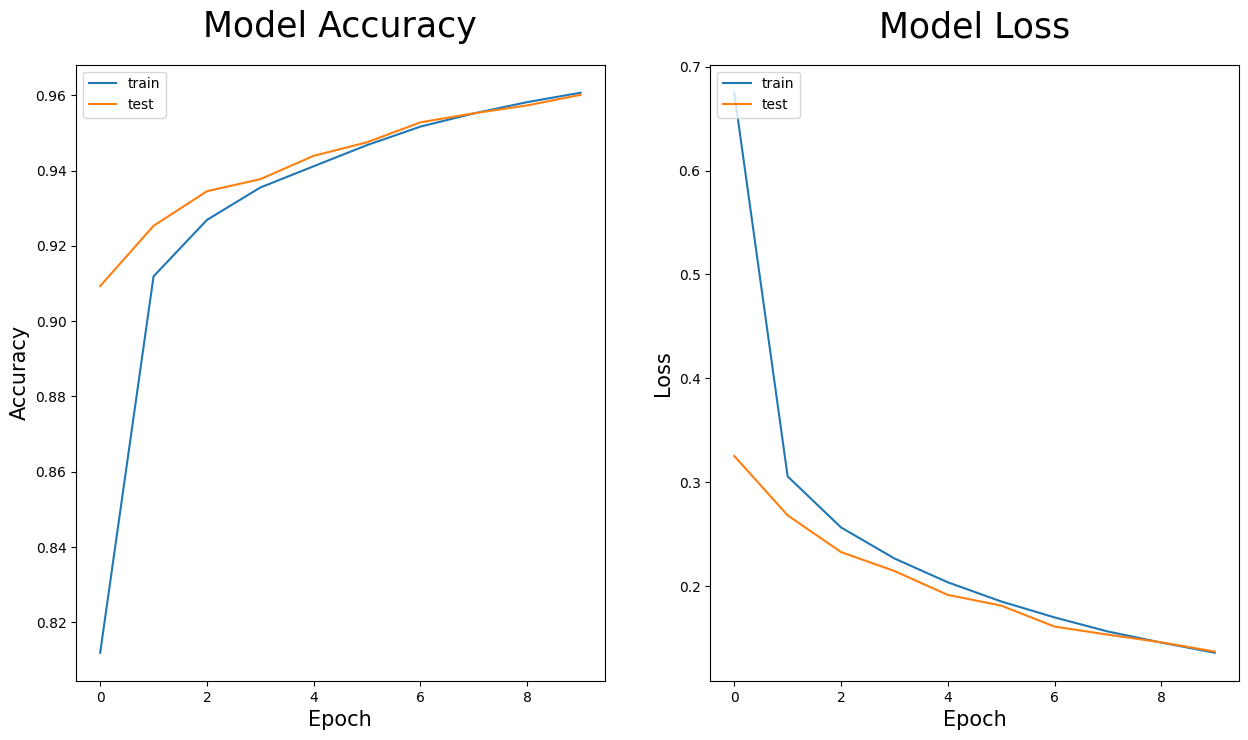

In [ ]:
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9535 - loss: 0.1630
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


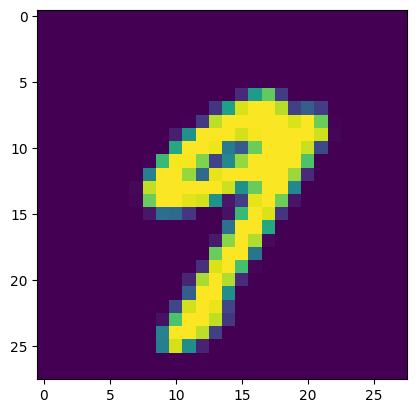

9


In [ ]:
loss,accuracy = model.evaluate(x_test,y_test)

predicted_value=model.predict(x_test)
plt.imshow(x_test[20])
plt.show()
print(np.argmax(predicted_value[20], axis=0))